<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_10/Hypothesis_Testing_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import statsmodels.api as sm
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
from scipy.stats import chi2

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Hypothesis Testing Part II
In this module, we will continue the discussion of hypothesis testing as we learn more about choosing the right test and the X<sup>2</sup> distribution.

# Statistical Inference Concerning Two Populations

# Expenditure and Default Data
Description:

Cross-section data on the credit history for a sample of applicants for a type of credit card.

https://vincentarelbundock.github.io/Rdatasets/doc/AER/CreditCard.html

An analyst claims the average income for credit card applicants that are accepted is more than the average income for credit card applicants that are rejected.

1. Specify the competing hypothesis to test the analyst's claim. State the significance level.

2. Calculate average income for both groups, and sample standard deviation.

3. Calculate value of the test statistic and p-value.

In [14]:
df = sm.datasets.get_rdataset("CreditCard", "AER").data

In [15]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [16]:
df.card.value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [17]:
# split dataset
df_approv = df[df['card'] == 'yes']
df_reject = df[df['card'] == 'no']
print(df_approv.shape, df_reject.shape)

(1023, 12) (296, 12)


Relevant parameter is the mean income between the two groups. 

Analyst wants to determine if the mean income is higher for accepted applicants vs rejected, that is μ<sub>1</sub> > μ<sub>2</sub>.

H<sub>0</sub>
 :  μ<sub>1</sub> - μ<sub>2</sub> ≤ 0

H<sub>A</sub> : μ<sub>1</sub> - μ<sub>2</sub> > 0

α = 0.01

In [18]:
alpha = 0.01

In [19]:
# mean and std
app_mean = df_approv.income.mean()
app_std = df_approv.income.std()
print(app_mean, app_std)

3.4512730205278537 1.7071164556141813


In [20]:
rej_mean = df_reject.income.mean()
rej_std = df_reject.income.std()
print(rej_mean, rej_std)

3.0685091216216236 1.6153364599777544


Because the population variance is known, we use the sample standard deviation.

In [23]:
# compute the test statistic

def test_stat(mu_1, mu_2, std_1, std_2, n_1, n_2):
  z = ((mu_1 - mu_2) - 0) / (math.sqrt((std_1**2/n_1) + (std_2**2/n_2)))
  return z


In [24]:
z_score = test_stat(app_mean, rej_mean, app_std, rej_std, len(df_approv), len(df_reject))
z_score

3.544114925520404

In [25]:
# convert z score to a p-value
p_value = stats.norm.sf(abs(z_score)) #onesided
p_value

0.00019696674458670644

In [26]:
if  p_value > alpha:
    # we are done...
    print("In accordance with Null Hypothesis, fail to reject")
else:
    # more work to do
    print ("We must check the significance before we reject the Null Hypothesis")

We must check the significance before we reject the Null Hypothesis


We reject the null hypothesis because the p_value is less than our chosen alpha. At the 1% significance level, the average income level for applicants that are accpepted is more than the average of applicants that are rejected.

# Statistical Inference Concerning Variance

# Z<sup>2</sup> Distribution

Note the upper tail vs. lower, remember to draw the curve. Using the table we can directly use _a_ when analyzing the upper tail. In python we subtract this from 1. When analyzing the lower tail, we must subtract by 1 to use the table, in python we do the opposite. 

This is because the function ppf looks at the distribution area, the table looks at the upper tail.

### Example 11.1 

_page 385_

Find the value x for which:

P(X<sup>2</sup><sub>5</sub> ≥ x ) = 0.025

In [3]:
upper_tail = .025
degf = 5

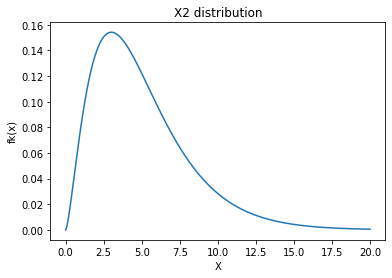

In [6]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=degf))
plt.title('X2 distribution')
plt.xlabel('X')
plt.ylabel('fk(x)')
plt.show()

In [8]:
p = stats.chi2.ppf(1-upper_tail, degf)
p

12.832501994030027

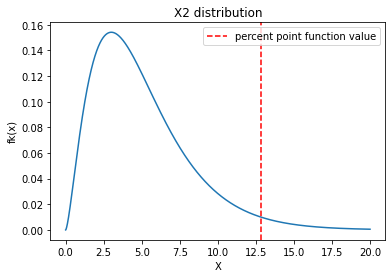

In [9]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=degf))
plt.axvline(x=p, color='r', linestyle='--', label='percent point function value')
plt.title('X2 distribution')
plt.xlabel('X')
plt.ylabel('fk(x)')
plt.legend()
plt.show()

Find the value x for:

P(X<sup>2</sup><sub>8</sub> < x ) = 0.025

In [12]:
lower_tail = .025
degf = 8

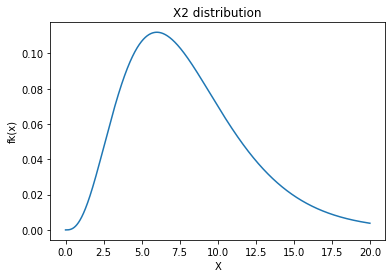

In [13]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=degf))
plt.title('X2 distribution')
plt.xlabel('X')
plt.ylabel('fk(x)')
plt.show()

In [14]:
p = stats.chi2.ppf(lower_tail, degf)
p

2.1797307472526497

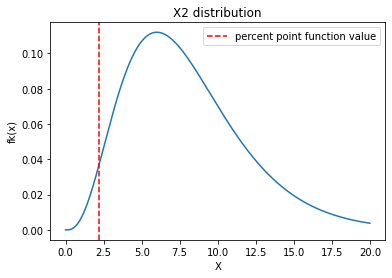

In [15]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=degf))
plt.axvline(x=p, color='r', linestyle='--', label='percent point function value')
plt.title('X2 distribution')
plt.xlabel('X')
plt.ylabel('fk(x)')
plt.legend()
plt.show()

### Confidence Intervals

###Example 11.2

_page 386_

Compute the 95% confidence intervals for the population standard deviation for the Growth fund and the Value fund, assume that returns are normally distributed.

In [22]:
df = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch11_Data_Files.xlsx", 
                   sheet_name='Growth_Value')

In [23]:
df.shape

(36, 3)

In [24]:
# number of intervals
df.index

RangeIndex(start=0, stop=36, step=1)

In [25]:
df.head()

,Year,Growth,Value
0,1984,-5.50,-8.59
1,1985,39.91,22.10
2,1986,13.03,14.74
3,1987,-1.70,-8.58
4,1988,16.05,29.05


### Recall the same dataset from Chapter 3 Descriptive Measures?

Let's visualize as a time series.

In [26]:
# lets visualize the time series
df.set_index('Year',inplace=True)

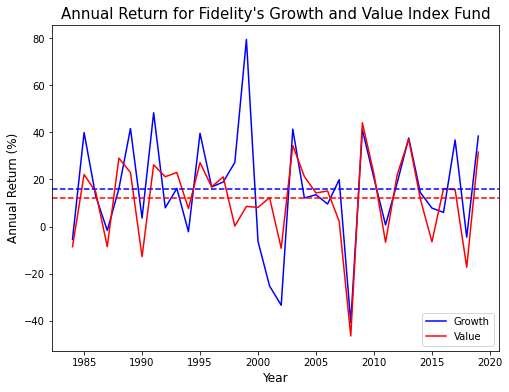

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# plot the values for each index
df['Growth'].plot(c='b', ax = ax)
df['Value'].plot(c='r', ax = ax)

# plot the average return
plt.axhline(y=df['Growth'].mean(), color='b', linestyle='--')
plt.axhline(y=df['Value'].mean(), color='r', linestyle='--')

# add legend and labels
plt.legend(loc=4)
plt.title("Annual Return for Fidelity's Growth and Value Index Fund", size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Annual Return (%)', size=12)
plt.show()

Caption here might remark on the annual return spikes that are noticable in the growth fund before 2000 that didn't appear to affect the Value fund in the same way. However both the Growth and Value fund had negative annual retun in a similar dip in ~2008.

Other items to notice are the cyclical nature of the datapoints that seem to occilate each year between high and low. With the Growth fund to have higher highs and the Value to have lower lows in the years 1985-1995.

In [40]:
# to calculate the sample standard deviation
s_growth = df['Growth'].std()
s_growth

23.799285403437764

In [41]:
v_growth = df['Value'].std()
v_growth

17.97918725320236

In [42]:
# determine 95% confidence interval
n = len(df)
# degrees of freedom
degf = n - 1

# a = 0.05, a/2 = 0.025
upper_tail = (1 - .95)/2
lower_tail = 1 - upper_tail

In [43]:
# lower tail
lower_x = stats.chi2.ppf(lower_tail, degf)
lower_x

53.20334854205644

In [45]:
# upper tail
upper_x = stats.chi2.ppf(upper_tail, degf)
upper_x

20.56937663074498

In [46]:
def conf_interval(degf, s_std, lower_x, upper_x):
  """
  Calculate lower and upper bound confidence interval,
  Standard deviation is squared to obtain the variance
  """
  lower_bound = (degf*s_std**2)/lower_x
  upper_bound = (degf*s_std**2)/upper_x
  return [lower_bound, upper_bound]

In [47]:
c_interval = conf_interval(degf, s_growth, lower_x, upper_x)
c_interval

[372.6120637750699, 963.7729842706474]

In [48]:
# Calculate the population standard deviation
[math.sqrt(x) for x in c_interval]

[19.30316201494123, 31.044693335103947]

Calculate for Value fund

In [49]:
c_interval = conf_interval(degf, v_growth, lower_x, upper_x)
c_interval

[212.65186139659275, 550.0308202383399]

In [50]:
# Calculate the population standard deviation
[math.sqrt(x) for x in c_interval]

[14.582587609769151, 23.452735879601335]

### Hypothesis Test for the Population Variance

Example 11.4

Is the standard deviation of returns for the Value fund different than 15%? (Equivalent to test if the variance differs from 225<sup>2</sup>. Conduct at 5% significance level.

H<sub>0</sub>
 :  σ<sup>2</sup> = 225

H<sub>A</sub> : σ<sup>2</sup> ≠ 225

α = 0.05

In [51]:
n = 36
a = 0.05
f_exp = 225
v_growth = df['Value'].std()
v_growth

17.97918725320236

In [57]:
def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    # size of sample
    n = len(x)
    # value of test statistic
    Q = (n - 1) * np.var(x) / va0 # va is the expected variance from null hypothesis
    print('Test statistic is:', Q)
    
    # tests for one tail lower
    if direction == "lower":
        q = chi2.ppf(alpha, n - 1)
        print("lower-bound:", q)
        if Q <= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    # tests for one tail upper
    elif direction == "upper":
        q = chi2.ppf(1 - alpha, n - 1)
        print("upper-bound:",q)
        if Q >= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    # tests for two tail
    else:
        q1 = chi2.ppf(alpha / 2, n - 1)
        q2 = chi2.ppf(1 - (alpha / 2), n - 1)
        print("lower-bound, upper-bound:", q1, q2)
        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"

In [58]:
var_test(df['Value'], va0 = f_exp, direction="two-tailed", alpha=a)

Test statistic is: 48.886751666666676
lower-bound, upper-bound: 20.56937663074499 53.20334854205644


'H_0 not rejected'

Test statistic shows that the X<sup>2</sup><sub>2</sub> is 48.88. We do not reject the null hypothesis because the lower bound is less than the test statistic and the upper bound is greater. 